# Exploring methods to generate graphs

In [1]:
import hopsworks
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Today's date ----- is this needed/helpful anywhere?
# today = pd.to_datetime('2023-12-13').date()
today = datetime.now().strftime('%Y-%m-%d')
#today = datetime.now().date()
print(type(today))
print(today)

<class 'str'>
2023-12-20


## Get most positive articles

In [3]:
project = hopsworks.login()
fs = project.get_feature_store()

most_positive_fg = fs.get_feature_group(name="articles_most_positive", version=2)
most_positive_df = most_positive_fg.read()
most_positive_df.head()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/187540
Connected. Call `.close()` to terminate connection gracefully.


Finished: Reading data from Hopsworks, using Hive (1.63s) 


,article_id,title,link,description,content,pubdate,source_id,country,category,language,sentiment,avg_sentiment
0,aa734493ed7a2661a934c7bfdab45025,'Wonderful' - Danny Murphy wowed by one Everto...,https://www.goodisonnews.com/2023/12/17/burnle...,Danny Murphy singled out Everton wing-back Nat...,Patterson was recalled to the staring line-up ...,2023-12-17,goodisonnews,"[""united kingdom""]","[""sports""]",english,0.999773,0.123222
1,f6857581b42e08f73cbeb51f43729bbf,Kim Kardashian gifted a model of her BRAIN,https://www.perthnow.com.au/entertainment/cele...,Kim Kardashian has received an unusual Christm...,Kim Kardashian has been given a sculpture of h...,2023-12-18,perthnow,"[""australia""]","[""entertainment""]",english,0.999852,0.136437
2,be083f9660c4701c7612c1e90df4ce92,Here Are The 15 Finest Gangster Movies You Can...,https://thenewstrace.com/here-are-the-15-fines...,Here Are The 15 Finest Gangster Movies You Can...,Here Are The 15 Finest Gangster Movies You Can...,2023-12-19,thenewstrace,"[""ireland""]","[""top""]",english,0.999823,-0.183482
3,e05738af8b58e88f30b1a044baccb674,Kim Kardashian has been given a sculpture of h...,https://home.nzcity.co.nz/news/article.aspx?id...,The 'Kardashians' star - who is studying to be...,The 43-year-old star shared a video of the bra...,2023-12-20,nzcity,"[""new zealand""]","[""top""]",english,0.999530,-0.356134


In [4]:
print("Number of most articles:", len(most_positive_df))

Number of most articles: 4


In [5]:
import numpy as np
# Get ratings of most positive articles
most_positive_sentiment = most_positive_df["sentiment"].values
most_positive_date = most_positive_df["pubdate"].values


In [17]:
todays_df = most_positive_df[most_positive_df['pubdate'] == today]
most_positive_date = np.append(most_positive_date, (todays_df["pubdate"].values))
most_positive_sentiment = np.append(most_positive_sentiment, todays_df["sentiment"].values)
for i in range(len(most_positive_date)):
    print(most_positive_date[i])

2023-12-17
2023-12-18
2023-12-19
2023-12-20
2023-12-20
2023-12-20


In [15]:
def plot_most_positive_timeline(most_positive_sentiment, most_positive_date, n):
    if len(most_positive_date) > n:
        most_positive_date = most_positive_date[-n:]
        most_positive_sentiment = most_positive_sentiment[-n:]
    else:
        n = len(most_positive_date)
    

    plt.plot(most_positive_date, most_positive_sentiment, '--co')
    plt.xlabel("Date")
    plt.ylabel("Sentiment Rating")
    plt.ylim(-1,1.1)
    plt.title(f"Sentiment Ratings of Most Positive Articles for the Past {n} Days ")
    plt.savefig('./most_positive_timeline.png')
    plt.show()

2023-12-20 16:38:20,407 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-20 16:38:20,408 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


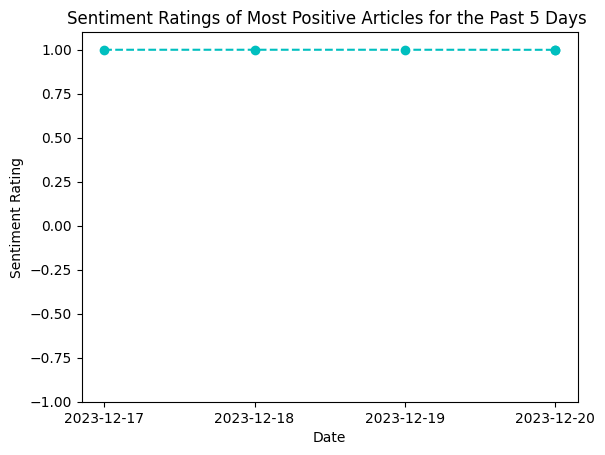

In [16]:
plot_most_positive_timeline(most_positive_sentiment, most_positive_date, 5)

In [8]:
def plot_average_sentiment_timeline(average_sentiment, most_positive_date, n):
    if len(most_positive_date) > n:
        most_positive_date = most_positive_date[-n:]
        average_sentiment = average_sentiment[-n:]
    else:
        n = len(most_positive_date)
    

    plt.plot(most_positive_date, average_sentiment, '--om')
    plt.xlabel("Date")
    plt.ylabel("Sentiment Rating")
    plt.ylim(-1,1.1)
    plt.title(f"Average Sentiment Ratings of the Past {n} Days ")
    plt.savefig('./average_sentiment_timeline.png')
    #plt.show()

2023-12-20 16:33:04,005 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-20 16:33:04,007 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


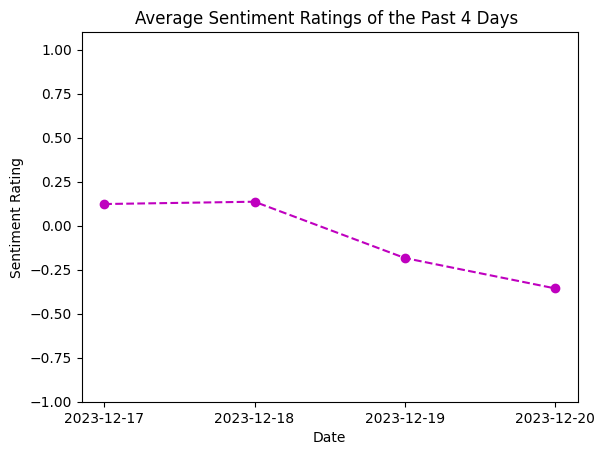

In [9]:
average_sentiment = most_positive_df["avg_sentiment"].values
plot_average_sentiment_timeline(average_sentiment, most_positive_date, n=5)